# HW1_ ARTURO_VILLALOBOS_827008236

## Question 1 ( Theoretical question )

For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.
 
(a) The sample size n is extremely large, and the number of predictors p is small.

(b) The number of predictors p is extremely large, and the number of observations n is small.

(c) The relationship between the predictors and response is highly non-linear.

(d) The variance of the error terms, i.e. $\sigma^2$ = Var($\epsilon$), is extremely high.


- A 
    * when n is large and and the number of predictors is small the best model to go wtih is one that will not over fit the data . in this case where we have alot of data and not many predictors , fitting a linear or polynomial regression model would require us to use a prametric ,inflexable , statistical model if we have an intuition about the underlying relationship, this in turn would have better preformance. If we do not have any idea what the underlying relationship would be , we can leverage the fact that we have lots of data to train the model and it would be feasable given the fact that we have a set with not many predictors.   
- B
    * conversly when we have a low sample size but many predictors, is would be better to a flexible statistical model like like KNN this would allow us top predict outcomes. this due to the fact that with non-parametric we can have infinite parameters. At first we could run the risk of over fitting the model to such a small data set then predict wrong values when a new test set arrives but with iteration we can tune this balance of bias and varience while the parametric model will slowly become more biased with newer data
- C
    * when the response predictor relationship is highly non linear it is best to use a more flexible model 
- D
    * here varience of the error terms is very high we are best suited to use a inflexible model as a flexible model would overfit and take into account the noise increasing the varience and increasing the reducable error


### A
- flexible models have less bias , this is convinient becuase p is small 
-  with large p flexible models are not pref
### b
 - inflexibles models are preferable parameters and predictors are low 

## Question 2 （Computational question）Linear Regression

*source: James et. al (2013) An Introduction to Statistical Learning with Application in R.*

`Background`: Suppose that we are statistical consultants hired by a client to provide advice on how to improve sales of a particular product. The Advertising data set consists of the sales of that product in 200 different markets, along with advertising budgets for the product in each of those markets for three different media: TV, radio, and newspaper. It is not possible for our client to directly increase sales of the product. On the other hand, they can control the advertising expenditure in each of the three media. Therefore, if we determine that there is an association between advertising and sales, then we can instruct our client to adjust advertising budgets, thereby indirectly increasing sales. **In other words, our goal is to develop an accurate model that can be used to predict sales on the basis of the three media budgets.**

`Data Description`: 
* *Input variables (explantory variable)*: the advertising budgets. 
* *Output variable (response variable)*: sales.  


In [1]:
# load modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load data
data = pd.read_csv("Advertising.csv", header = 0, 
                   usecols = ['TV', 'Radio', 'Newspaper', 'Sales']) ## header = 0  
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [3]:
## This data frame includes 200 samples
n = data.shape[0]
n

200

In [4]:
# Explore the relationship between TV and sales
# TV column is the explantory variable
# Sales column is the response variable
X = data.TV.to_numpy().reshape(-1,1) 
y = data.Sales.to_numpy().reshape(-1,1)

# We treat the first 150 samples as training data and the rest 50 as testing data
n0 = 150

# Split the data into training/testing sets
X_train = X[:n0]
X_test  = X[n0:]

# Split the targets into training/testing sets
y_train = y[:n0]
y_test  = y[n0:]

In [5]:
# Create linear regression object
model = LinearRegression()

# Train the model using the training sets
model.fit(X_train,y_train)

# Make predictions using the testing set
y_pred_test  = model.predict(X_test)

# Make predictions using the training set
y_pred_train = model.predict(X_train)

# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print('Test Mean squared error: %.2f'
      % mean_squared_error(y_test,y_pred_test))
print('Train Mean squared error: %.2f'
      % mean_squared_error(y_train, y_pred_train))
# The coefficient of determination: 1 is perfect prediction
#print('Coefficient of determination: %.2f'
    #  % r2_score(diabetes_y_test, diabetes_y_pred))


Coefficients: 
 [[0.04906288]]
Test Mean squared error: 13.17
Train Mean squared error: 9.77


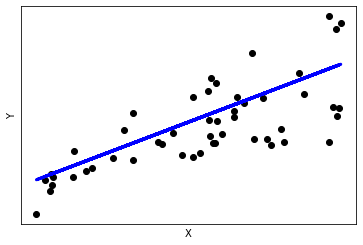

In [6]:
# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred_test, color='blue', linewidth=3)

plt.xlabel('X')
plt.ylabel('Y')

plt.xticks(())
plt.yticks(())

plt.show()

$\beta_1 +\beta_2 * x ]\beta_3 *x^2$

## Question 3 (Computational question) 

The synethtic data pairs $\{(x_i,y_i)\}_{i = 1}^{400}$ are generated according to the polynomial model: 

$$ Y = 2 - 4X^2 + \epsilon $$

The error $\epsilon$ are generated from $N(0,1)$ and the covariates are generated from $N(0,2^2)$

Firstly we create a separate taining data of 300 and testing data 100. 

1. Fit a linear model in the training 
2. Fit a quadratic model in the training 
3. Fit a polynomial of order 8. 
4. Compare their MSE train. 
5. Compare their MSE test. 

In [7]:
# import module
from sklearn.preprocessing import PolynomialFeatures

In [8]:
## Synthetic Data Generation
n = 400 # sample size
X = np.random.normal(0,2,n) # fixed covariate
eps = np.random.normal(0,1,n) # random term
y = 2 - 4 * X**2 + eps
X = X.reshape(-1,1)
y = y.reshape(-1,1)

n = 300
# Split the data into training/testing sets
X_train = X[:n0]
X_test  = X[n0:]

# Split the targets into training/testing sets
y_train = y[:n0]
y_test  = y[n0:]

In [9]:
# Answer question 1,2,3 in this cell

## Define a linear regression model
model_lin = LinearRegression()
## Fit the data
model_lin.fit(X_train,y_train)

## Create the polynomial matrix [1,x,x^2]
x_poly2_train = PolynomialFeatures(degree = 2).fit_transform(X_train)
## Fit model
model_quad = LinearRegression().fit(x_poly2_train, y_train)

## Create the polynomial matrix of order 8
x_poly8_train = PolynomialFeatures(degree = 8).fit_transform(X_train)
## Fit model
model_poly8 = LinearRegression().fit(x_poly8_train, y_train)

In [10]:
# Answer question 4 in this cell

## Make prediction on X_train
y_lin_pred_train = model_lin.predict(X_train)
y_quad_pred_train = model_quad.predict(x_poly2_train)
y_poly8_pred_train = model_poly8.predict(x_poly8_train)

## Compute the MSE
lin_mse_train = mean_squared_error(y_train, y_lin_pred_train)
quad_mse_train = mean_squared_error(y_train, y_quad_pred_train)
poly8_mse_train = mean_squared_error(y_train, y_poly8_pred_train)

print("The MSE error of training data using a linear model: ", lin_mse_train)
print("The MSE error of training data using a quadratic model: ", quad_mse_train)
print("The MSE error of training data using a polynomial of order 8: ", poly8_mse_train)

The MSE error of training data using a linear model:  648.8180541306635
The MSE error of training data using a quadratic model:  1.148298901737548
The MSE error of training data using a polynomial of order 8:  1.117240994411775


In [11]:
# Answer question 5 in this cell
## Create the test polynomial matrix
x_poly2_test = PolynomialFeatures(degree = 2).fit_transform(X_test)
x_poly8_test = PolynomialFeatures(degree = 8).fit_transform(X_test)

## Make prediction on X_test
y_lin_pred_test = model_lin.predict(X_test)
y_quad_pred_test = model_quad.predict(x_poly2_test)
y_poly8_pred_test = model_poly8.predict(x_poly8_test)

## Compute MSE
lin_mse_test = mean_squared_error(y_test, y_lin_pred_test)
quad_mse_test = mean_squared_error(y_test, y_quad_pred_test)
poly8_mse_test = mean_squared_error(y_test, y_poly8_pred_test)

print("The MSE error of testing data using a linear model: ", lin_mse_test)
print("The MSE error of testing data using a quadratic model: ", quad_mse_test)
print("The MSE error of testing data using a polynomial of order 8: ", poly8_mse_test)

The MSE error of testing data using a linear model:  613.4020182741004
The MSE error of testing data using a quadratic model:  1.096559700341848
The MSE error of testing data using a polynomial of order 8:  47.10888326667006


### Interpretation
- i think these mean squared errors show that both the quadratic and polynomial models can fit this data , this is most likly due to the fact that polynomials of even-numbered higher order can look like simple quadratics with flatter bottoms so it wouldnt be so hard for a model of order 8 to look like a quadratic model

NOTE -- i really wanted to plot the diffrent models but for some reason i couldnt get it to work , if you have any feedback i would really appreciate it, Thank you.

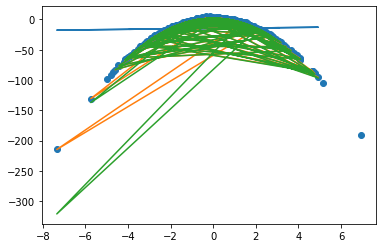

In [12]:

fig, ax = plt.subplots()
ax.scatter(X,y)
ax.plot(X_test, y_lin_pred_test)

ax.plot(X_test, y_quad_pred_test)

ax.plot(X_test, y_poly8_pred_test)




plt.axis('tight')


plt.show()

## Question 4.(a)（Theoretical question）

I collect a set of data ($n = 100$ observations) containing a single predictor and a quantitative response. I then fit a linear regression model to the data, as well as a separate cubic regression, i.e. $Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \varepsilon$. 

(a) Suppose that the true relationship between X and Y is linear, i.e. $Y = \beta_0 + \beta_1X + \varepsilon$. Consider the training residual sum of squares (RSS) for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

(b)What will be your answer for (a) if you use test RSS rather than training RSS.


- A
    - despite the fact that the cuibic model would be more flexible to fit these 100 data points , the underlying true relationship is linear so i will stay that the linear model will have a lower RRS than that of the cubic model however this is being said not knowing anything about the training data or whether or not its really representative of the real relationship
- B
    - Again , we know that the true relationship is a linear one , the RSS from the test data will more closly follow that of the linear model generated from the training data , if we where to use a cubic model , the varience would hinder its ability to accuratly model testing data 

## Question 4.(b)（Theoretical question）

(a) Suppose that the true relationship between $X$ and $Y$ is not linear, but we don't know how far it is from linear. Consider the training RSS for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer. 

(b)What will be your answer for (a) if you use test RSS rather than training RSS.

- A 
    - in this case i would expect the RRS for the cubic model to be lower relative to that of the linear model due to its increased relative flexability, even if ther true relationship is niether linear nor cubic, the ability for the cubic model to overfit the data would lead to a lower RSS.
- B
     - in this case it is hard to say , i will say that there is not enough information about the underlying relationship to even make an educated guess. if the true relationship is not linear but very nearly linear , then of course the linear model would have a lower RSS when it come to both training and testing data , conversly if the true relationship is far from linear the way a cubic model is than the training RSS would be lower but theree isnt enough information to say definitivly which is lower.

## Question 4 （Theoretical question）

Consider the fitted values that result from performing linear regression without an intercept. In this setting, the $\textit{i}^{th}$ fitted value takes the form

$$\hat{y_i} = x_i\widehat{\beta},$$ 

where

$$\hat{\beta} =  (\sum_{i=1}^{n}x_{i}y_{i})/(\sum_{i=1}^{n}x_{i}^2).$$

Show that we can write

$$\hat{y_i} = \sum_{i=1}^{n}a_{i}y_{i}.$$

What is $a_{i}$?


- work and answer on image below below 
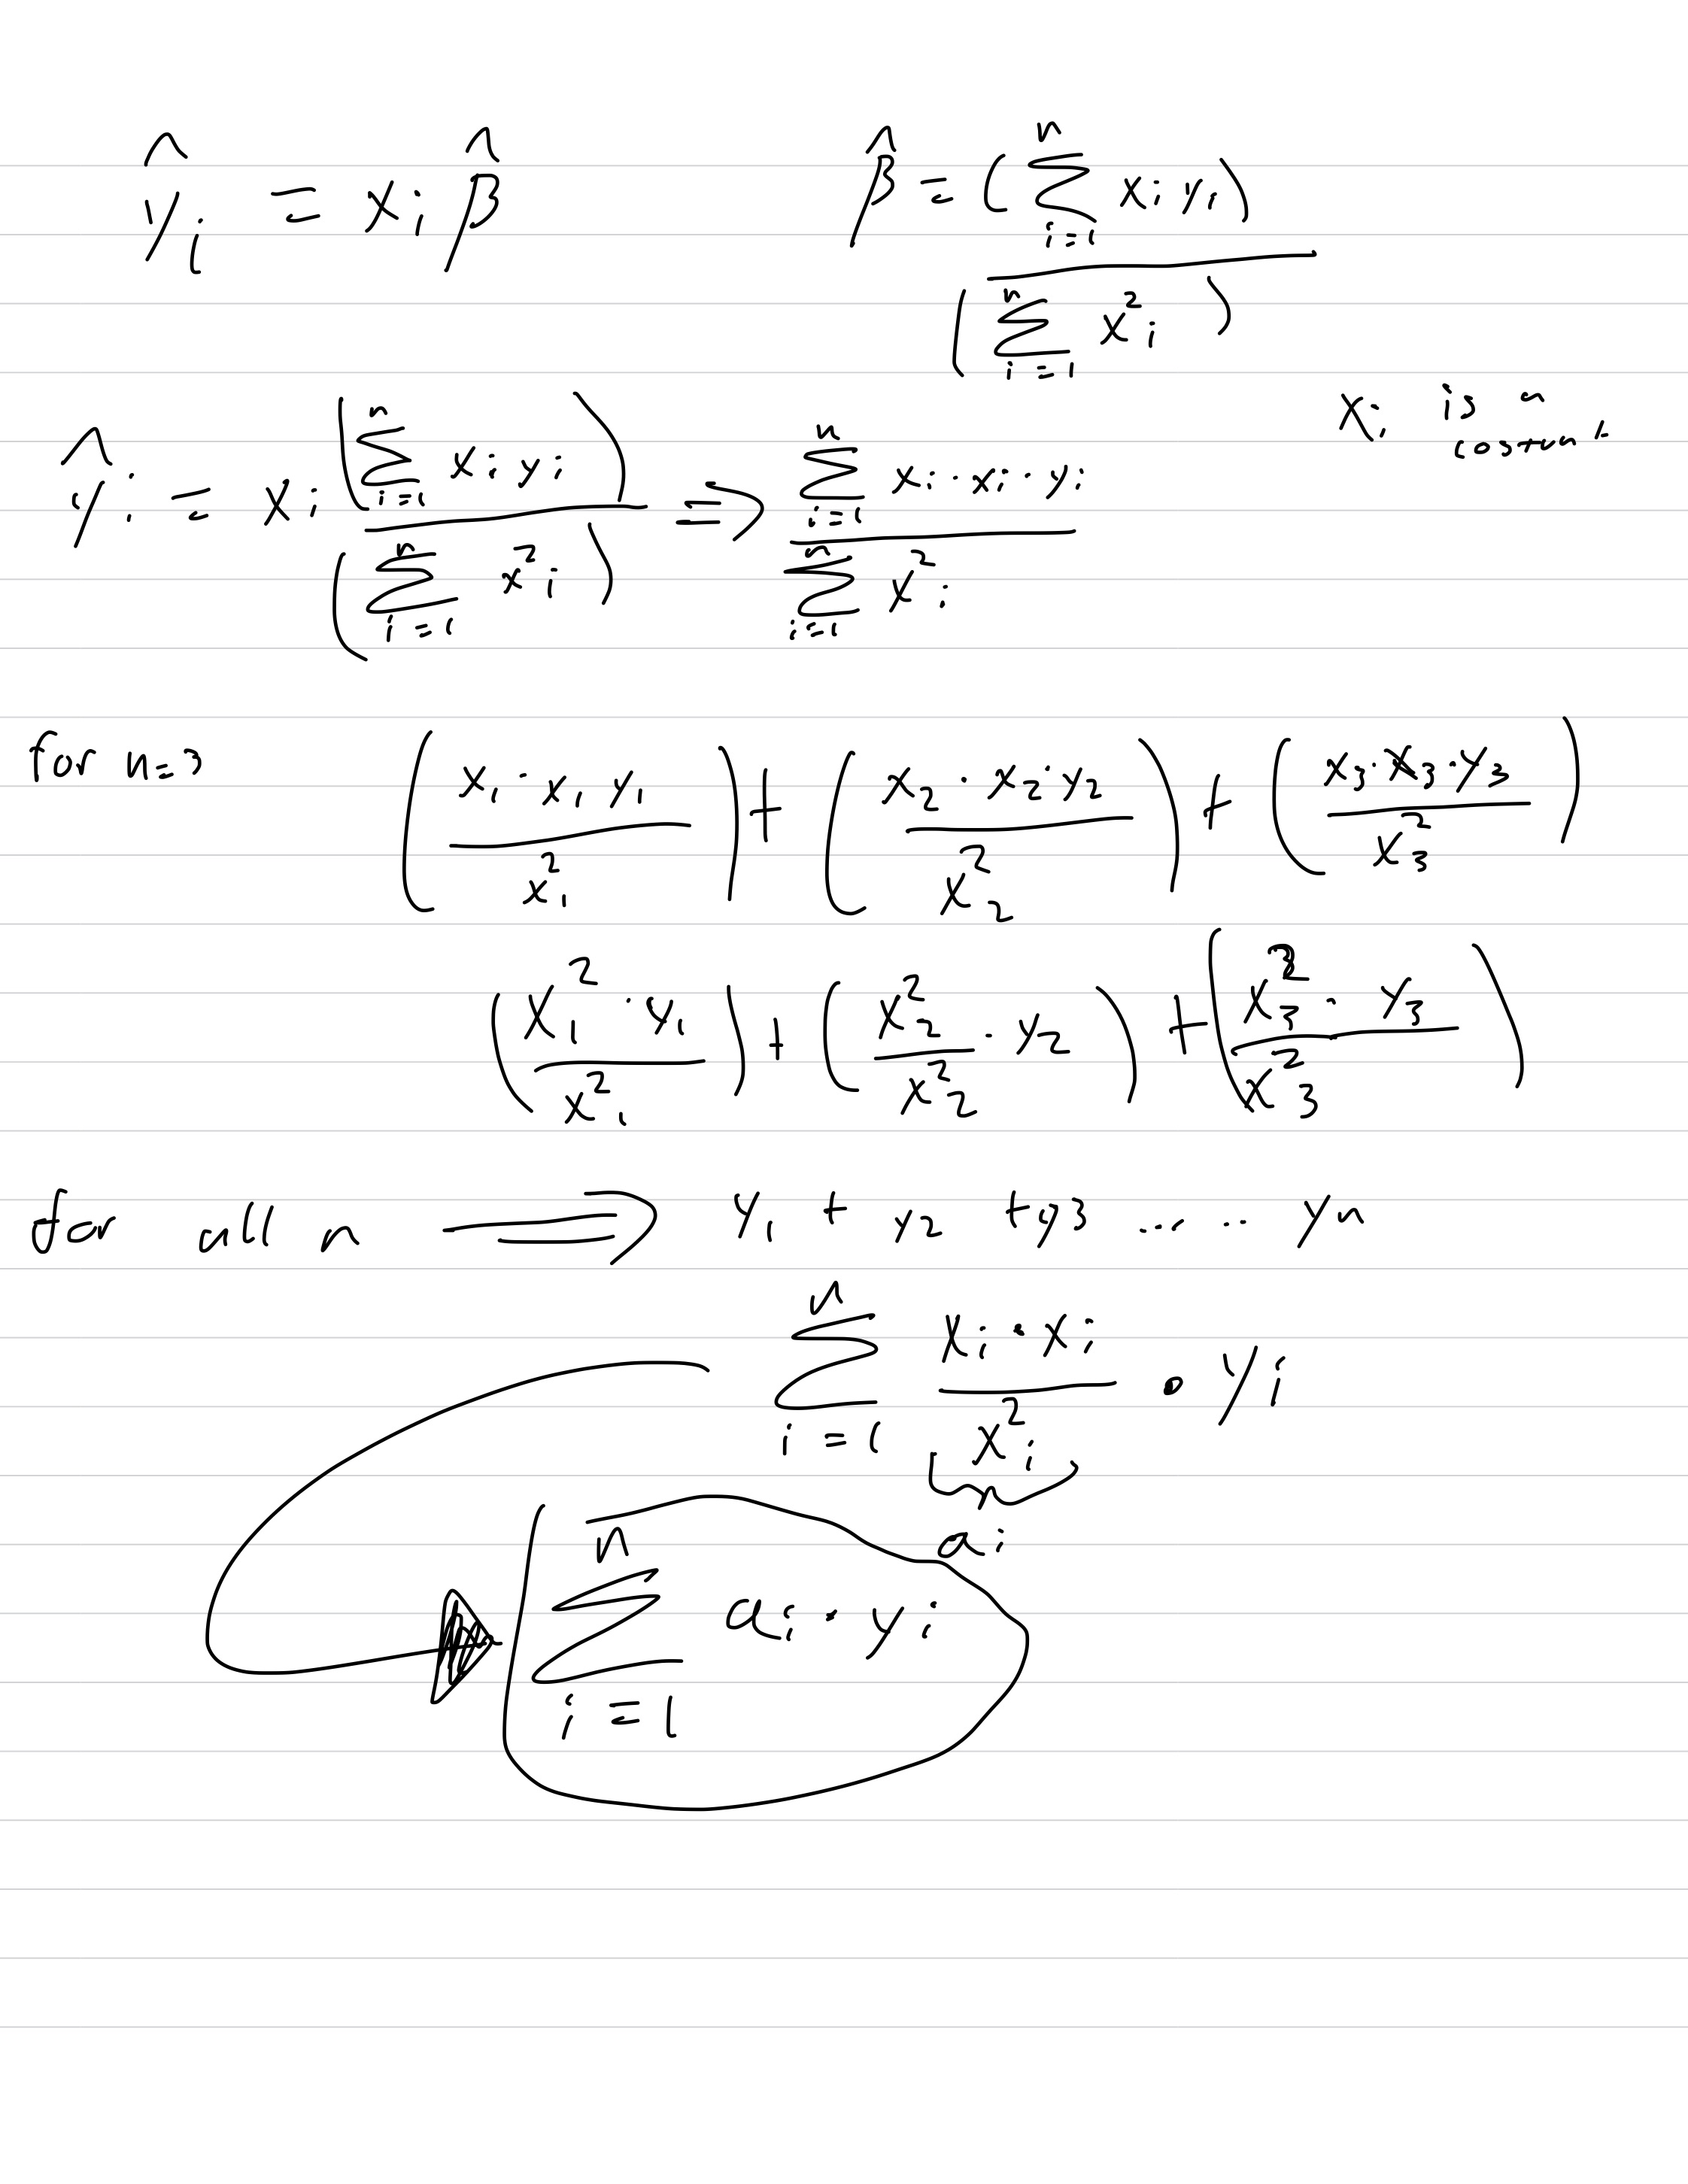

## Question 5 （Theoretical question）

The table below provides a training data set containing six observations, three predictors, and one qualitative response variable. 

| Obs. | $X_1$ | $X_2$ | $X_3$ | $Y$   |
|------|-------|-------|-------|-------|
| 1    | 0     | 3     | 0     | Red   |
| 2    | 2     | 0     | 0     | Red   |
| 3    | 0     | 1     | 3     | Red   |
| 4    | 0     | 1     | 2     | Green |
| 5    | -1    | 0     | 1     | Green |
| 6    | 1     | 1     | 1     | Red   |


Suppose we wish to use this data set to make a prediction for Y when $X_1 = X_2 = X_3 = 0$ using K-nearest neighbors.

(a) Compute the Euclidean distance between each observation and the test point, $X_1 = X_2 = X_3 = 0$.

(b) What is our prediction with $K = 1$? Why?

(c) What is our prediction with $K = 3$? Why?

(d) If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the $\textit{best}$ value for K to be large or small? Why?

- A
    -   | Distance    | y     | observation |
        |-------------|-------|-------------|
        | √9 = 3      | red   | 1           |
        | √4 = 2      | red   | 2           |
        | √10 = 3.162 | red   | 3           |
        | √5 = 2.236  | green | 4           |
        | √2 = 1.414  | green | 5           |
        | √3 = 1.732  | red   | 6           |
        
- B
    - because $X_1$ = $X_2$ = $X_3$ = 0 with a k = 1 our nearest neighbor would be obs 5 and we would predict Green
- C
    - following the same method above we cann look at all of nearest neighbors (up to three) observation 2,5,6 have responses of red, green, and red. we can easily see that we would predict red in this case.
- D
    - to fit a highly non-linear relationship we would need a high level of flexability in the model, this would require us to choose a smaller value of K , our training error would be small but as new data is tested we would see more incorrect predictions.